In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('D3.csv')

In [79]:
df.head(100)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


In [80]:
len(df)

100

In [81]:
x = df.values[:, 2]
y = df.values[:, 3]
m = len(y)
print('x =', x[: 100])
print('y =', y[: 100])
print('m =', m)
len(x)

x = [0.44       0.88848485 1.3369697  1.78545454 2.23393939 2.68242424
 3.13090909 3.57939394 0.02787879 0.47636364 0.92484849 1.37333333
 1.82181818 2.27030303 2.71878788 3.16727273 3.61575758 0.06424242
 0.51272727 0.96121212 1.40969697 1.85818182 2.30666667 2.75515152
 3.20363636 3.65212121 0.10060606 0.54909091 0.99757576 1.44606061
 1.89454546 2.3430303  2.79151515 3.24       3.68848485 0.1369697
 0.58545455 1.03393939 1.48242424 1.93090909 2.37939394 2.82787879
 3.27636364 3.72484848 0.17333333 0.62181818 1.07030303 1.51878788
 1.96727273 2.41575758 2.86424242 3.31272727 3.76121212 0.20969697
 0.65818182 1.10666667 1.55515151 2.00363636 2.45212121 2.90060606
 3.34909091 3.79757576 0.24606061 0.69454545 1.1430303  1.59151515
 2.04       2.48848485 2.9369697  3.38545454 3.83393939 0.28242424
 0.73090909 1.17939394 1.62787879 2.07636364 2.52484849 2.97333333
 3.42181818 3.87030303 0.31878788 0.76727273 1.21575758 1.66424242
 2.11272727 2.56121212 3.00969697 3.45818182 3.90666667 0.3

100

Text(0.5, 1.0, 'Scatter Plot of Training Data')

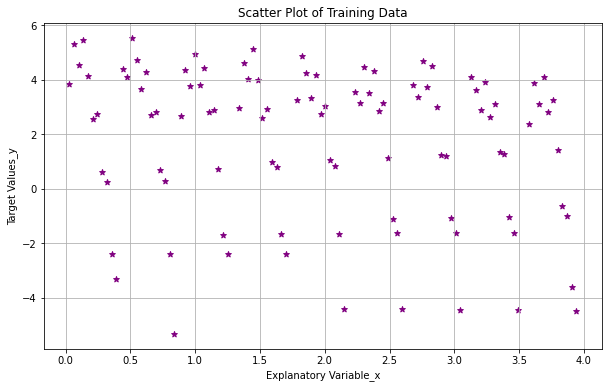

In [82]:
plt.scatter(x, y, color = 'purple', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Explanatory Variable_x')
plt.ylabel('Target Values_y')
plt.title('Scatter Plot of Training Data')

In [83]:
x_0 = np.ones((m, 1))
x_0[: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [84]:
x_1 = x.reshape(m, 1)
x_1[: 5]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939]])

In [85]:
x = np.hstack((x_0, x_1))
x[: 5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [86]:
theta = np.zeros((2, 1))
theta

array([[0.],
       [0.]])

In [87]:
def compute_loss(x, y, theta):
    
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)


    return J

In [88]:
loss = compute_loss(x, y, theta)
print('The loss for given values of theta_0 and theta_1 =', loss)

The loss for given values of theta_0 and theta_1 = 552.4438459196241


In [89]:
def gradient_descent(x, y, theta, alpha, iterations): 
   
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history[i] = compute_loss(x, y, theta)
        
    return theta, loss_history    

In [110]:
theta = [0, 0]
iterations = 5000;
alpha = 0.01;

In [111]:
theta, loss_history = gradient_descent (x, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('loss_history =', loss_history)

Final value of theta = [ 2.87138764 -0.52046925]
loss_history = [5.40768785 5.30397076 5.21178297 ... 3.62945112 3.62945112 3.62945112]


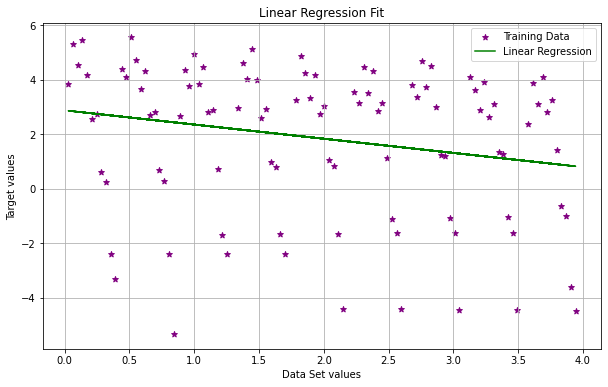

In [112]:
plt.scatter(x[:, 1], y, color = 'purple', marker = '*', label = 'Training Data')
plt.plot(x[:, 1], x.dot(theta), color = 'green', label = 'Linear Regression')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Data Set values')
plt.ylabel('Target values')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

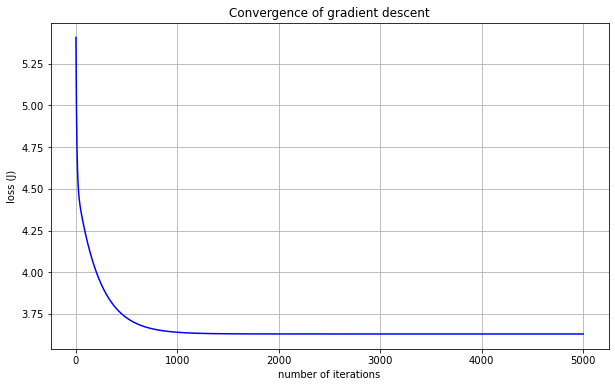

In [113]:
plt.plot(range(1, iterations + 1), loss_history, color = 'blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')